This is a workflow for tidying the hollar data and adding the relevant total_sesion action data associated
with the relevant day. Fortunately Hollar run their LOAD.SPOTS files consistently. 

With more complicated clients will need to do something more complicated

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [6]:
df = pd.read_csv('~/DataAnalysis/csv_files/client_specific_data_0110_0104/1337_current_all_data.csv')

dt_ts = pd.read_csv('~/DataAnalysis/csv_files/client_specific_data_0110_0104/client_1337_1_total_actions_per_day.csv')
dt_ts_sorted = dt_ts.sort_values(by="date")
print (dt_ts_sorted.dtypes)
dt_ts_sorted['date'] = pd.to_datetime(dt_ts_sorted['date'])
print (dt_ts_sorted.dtypes)
dt_ts_sorted





Unnamed: 0        int64
date             object
total_per_day     int64
dtype: object
Unnamed: 0                int64
date             datetime64[ns]
total_per_day             int64
dtype: object


,Unnamed: 0,date,total_per_day
32,32,2017-08-21,97615
5,5,2017-08-22,81086
46,46,2017-08-23,70373
4,4,2017-08-24,65179
36,36,2017-08-25,71353
25,25,2017-08-26,64605
0,0,2017-08-27,92115
18,18,2017-08-28,68162
44,44,2017-08-29,69001
37,37,2017-08-30,60359


In [7]:
df_trimmed =  df.drop(['Unnamed: 0','jobs', 'total_cost', 'total_time_in_queue', 
                         'total_time_under_calculation', 'total_time_waiting',
                         'total_time_waiting', 'total_time_under_calculation',
                         'total_cost','totalrowcount', 'spot_total', 
                         'spot_granularity_1', 
                         'workticket_scheduled', 'workticket_started', 'workticket_finished'], axis=1)
df_trimmed.head(15)

,brandid,clientid,cluster_info,diffuse,jobcount,jobpriority,lag,lag_actions,last_job,last_job_time,...,micro,modelrowcount,origin,rawsize,slug,spot_duration,spot_finish,spot_start,workticket_duration,workticketid
0,1,1337,{u'2': 1},True,42,1008.01,True,3,INF.SCRUBDB,8.467,...,True,123,US(1),236000000000,hollar,86400.0,2017-10-01 00:00:00.000,2017-10-01 00:00:00.000,28496.426,59d3a993b712c904285d161d
1,1,1337,{u'2': 1},True,43,1008.01,True,3,INF.SENDEMAIL,0.787,...,True,6140,US(1),236000000000,hollar,86400.0,2017-10-01 00:00:00.000,2017-10-01 00:00:00.000,16109.378,59d272f5b43fdd11cf3755e7
2,1,1337,{u'2': 1},True,41,1008.87,True,3,INF.SCRUBDB,4976.259,...,True,5709,US(1),236000000000,hollar,86400.0,2017-09-30 00:00:00.000,2017-09-30 00:00:00.000,35398.932,59d14245b43fdd0bb470d7d8
3,1,1337,{u'2': 1},True,41,1008.87,True,3,INF.SCRUBDB,4976.259,...,True,6808,US(1),236000000000,hollar,86400.0,2017-09-29 00:00:00.000,2017-09-29 00:00:00.000,35525.145,59d13d95b43fdd02d38811ba
4,1,1337,{u'2': 1},True,41,1008.87,True,3,INF.SCRUBDB,4.301,...,True,115,US(1),236000000000,hollar,86400.0,2017-09-29 00:00:00.000,2017-09-29 00:00:00.000,32855.169,59cfdc0c28c9cb560cc59eeb
5,1,1337,{u'2': 1},True,41,1008.87,True,3,INF.SCRUBDB,4.301,...,True,107,US(1),236000000000,hollar,86400.0,2017-09-28 00:00:00.000,2017-09-28 00:00:00.000,32877.989,59cfdbf328c9cb560cc59ee9
6,1,1337,{u'2': 1},True,42,1008.99,True,3,INF.SCRUBDB,4.077,...,True,4844,US(1),236000000000,hollar,86400.0,2017-09-13 00:00:00.000,2017-09-13 00:00:00.000,39356.100,59bab7f5b43fdd57c2ba341b
7,1,1337,{u'2': 1},True,43,1009.88,True,3,INF.SENDEMAIL,0.902,...,True,3902,US(1),236000000000,hollar,86400.0,2017-09-12 00:00:00.000,2017-09-12 00:00:00.000,67990.806,59b96673b43fdd4dc0032ed7
8,1,1337,{u'2': 1},True,44,1008.98,True,3,INF.SCRUBDB,3402.323,...,True,4764,US(1),236000000000,hollar,86400.0,2017-09-11 00:00:00.000,2017-09-11 00:00:00.000,44098.867,59b814f6b43fdd44596fb191
9,1,1337,{u'2': 1},True,44,1008.98,True,3,INF.SCRUBDB,3402.323,...,True,123,US(1),236000000000,hollar,86400.0,2017-09-10 00:00:00.000,2017-09-10 00:00:00.000,46364.730,59b80c14b712c92ef3c6ad7a


In [8]:
cols = df_trimmed.columns.tolist()

new_cols = []
new_cols.insert(0, 'cluster_info')
new_cols.insert(0, 'jobcount')
new_cols.insert(0, 'workticketid')
new_cols.insert(0, 'lag')
new_cols.insert(0, 'origin')
new_cols.insert(0, 'last_job_time')
new_cols.insert(0, 'last_job')
new_cols.insert(0, 'workticket_duration')
new_cols.insert(0, 'spot_finish')
new_cols.insert(0, 'spot_start')
new_cols.insert(0, 'jobpriority')
new_cols.insert(0, 'lag_actions')
new_cols.insert(0, 'max_lag')
new_cols.insert(0, 'micro')
new_cols.insert(0, 'diffuse')
new_cols.insert(0, 'spot_duration')
new_cols.insert(0, 'modelrowcount')
new_cols.insert(0, 'rawsize')
new_cols.insert(0, 'slug')
new_cols.insert(0, 'clientid')
new_cols.insert(0, 'brandid')

df_trimmed = df_trimmed[new_cols]
df_trimmed.head()

,brandid,clientid,slug,rawsize,modelrowcount,spot_duration,diffuse,micro,max_lag,lag_actions,...,spot_start,spot_finish,workticket_duration,last_job,last_job_time,origin,lag,workticketid,jobcount,cluster_info
0,1,1337,hollar,236000000000,123,86400.0,True,True,14,3,...,2017-10-01 00:00:00.000,2017-10-01 00:00:00.000,28496.426,INF.SCRUBDB,8.467,US(1),True,59d3a993b712c904285d161d,42,{u'2': 1}
1,1,1337,hollar,236000000000,6140,86400.0,True,True,14,3,...,2017-10-01 00:00:00.000,2017-10-01 00:00:00.000,16109.378,INF.SENDEMAIL,0.787,US(1),True,59d272f5b43fdd11cf3755e7,43,{u'2': 1}
2,1,1337,hollar,236000000000,5709,86400.0,True,True,14,3,...,2017-09-30 00:00:00.000,2017-09-30 00:00:00.000,35398.932,INF.SCRUBDB,4976.259,US(1),True,59d14245b43fdd0bb470d7d8,41,{u'2': 1}
3,1,1337,hollar,236000000000,6808,86400.0,True,True,14,3,...,2017-09-29 00:00:00.000,2017-09-29 00:00:00.000,35525.145,INF.SCRUBDB,4976.259,US(1),True,59d13d95b43fdd02d38811ba,41,{u'2': 1}
4,1,1337,hollar,236000000000,115,86400.0,True,True,14,3,...,2017-09-29 00:00:00.000,2017-09-29 00:00:00.000,32855.169,INF.SCRUBDB,4.301,US(1),True,59cfdc0c28c9cb560cc59eeb,41,{u'2': 1}


In [9]:
mask = df_trimmed['cluster_info'].str.contains('clone', na=False)
rem_clones = df_trimmed[mask == False]
rem_clones

rename = rem_clones.rename(columns={'modelrowcount': 'total_number_of_spots'})
rename.dropna(subset=['slug'], inplace=True)

rename

,brandid,clientid,slug,rawsize,total_number_of_spots,spot_duration,diffuse,micro,max_lag,lag_actions,...,spot_start,spot_finish,workticket_duration,last_job,last_job_time,origin,lag,workticketid,jobcount,cluster_info
0,1,1337,hollar,236000000000,123,86400.0,True,True,14,3,...,2017-10-01 00:00:00.000,2017-10-01 00:00:00.000,28496.426,INF.SCRUBDB,8.467,US(1),True,59d3a993b712c904285d161d,42,{u'2': 1}
1,1,1337,hollar,236000000000,6140,86400.0,True,True,14,3,...,2017-10-01 00:00:00.000,2017-10-01 00:00:00.000,16109.378,INF.SENDEMAIL,0.787,US(1),True,59d272f5b43fdd11cf3755e7,43,{u'2': 1}
2,1,1337,hollar,236000000000,5709,86400.0,True,True,14,3,...,2017-09-30 00:00:00.000,2017-09-30 00:00:00.000,35398.932,INF.SCRUBDB,4976.259,US(1),True,59d14245b43fdd0bb470d7d8,41,{u'2': 1}
3,1,1337,hollar,236000000000,6808,86400.0,True,True,14,3,...,2017-09-29 00:00:00.000,2017-09-29 00:00:00.000,35525.145,INF.SCRUBDB,4976.259,US(1),True,59d13d95b43fdd02d38811ba,41,{u'2': 1}
4,1,1337,hollar,236000000000,115,86400.0,True,True,14,3,...,2017-09-29 00:00:00.000,2017-09-29 00:00:00.000,32855.169,INF.SCRUBDB,4.301,US(1),True,59cfdc0c28c9cb560cc59eeb,41,{u'2': 1}
5,1,1337,hollar,236000000000,107,86400.0,True,True,14,3,...,2017-09-28 00:00:00.000,2017-09-28 00:00:00.000,32877.989,INF.SCRUBDB,4.301,US(1),True,59cfdbf328c9cb560cc59ee9,41,{u'2': 1}
6,1,1337,hollar,236000000000,4844,86400.0,True,True,14,3,...,2017-09-13 00:00:00.000,2017-09-13 00:00:00.000,39356.100,INF.SCRUBDB,4.077,US(1),True,59bab7f5b43fdd57c2ba341b,42,{u'2': 1}
7,1,1337,hollar,236000000000,3902,86400.0,True,True,14,3,...,2017-09-12 00:00:00.000,2017-09-12 00:00:00.000,67990.806,INF.SENDEMAIL,0.902,US(1),True,59b96673b43fdd4dc0032ed7,43,{u'2': 1}
8,1,1337,hollar,236000000000,4764,86400.0,True,True,14,3,...,2017-09-11 00:00:00.000,2017-09-11 00:00:00.000,44098.867,INF.SCRUBDB,3402.323,US(1),True,59b814f6b43fdd44596fb191,44,{u'2': 1}
9,1,1337,hollar,236000000000,123,86400.0,True,True,14,3,...,2017-09-10 00:00:00.000,2017-09-10 00:00:00.000,46364.730,INF.SCRUBDB,3402.323,US(1),True,59b80c14b712c92ef3c6ad7a,44,{u'2': 1}


In [10]:
temp = pd.DatetimeIndex(rename['spot_start'])
print (temp.dtype)
rename['spot_start_date'] = temp.date
rename['spot_start_time'] = temp.time
rename['spot_start_date'] = pd.to_datetime(rename['spot_start_date'])

print (rename.dtypes)

# rename['spot_start_time'], rename['spot_start_date'] = rename['spot_start_date'].apply(lambda x:x.time()), rename['spot_start_date'].apply(lambda x:x.date())

# df = pd.DataFrame({'Date':['2014-07-17 00:59:27.400189+00']})
# df['Date'] = pd.to_datetime(df['Date'])
# df['Time'],df['Date']= df['Date'].apply(lambda x:x.time()), df['Date'].apply(lambda x:x.date())
# df

datetime64[ns]
brandid                           int64
clientid                          int64
slug                             object
rawsize                           int64
total_number_of_spots             int64
spot_duration                   float64
diffuse                            bool
micro                              bool
max_lag                           int64
lag_actions                       int64
jobpriority                     float64
spot_start                       object
spot_finish                      object
workticket_duration             float64
last_job                         object
last_job_time                   float64
origin                           object
lag                                bool
workticketid                     object
jobcount                          int64
cluster_info                     object
spot_start_date          datetime64[ns]
spot_start_time                  object
dtype: object


In [11]:
rename_sorted = rename.sort_values(by="spot_start_date")
rename_sorted.drop(['spot_start'], axis=1)
rename_sorted.head(5)

,brandid,clientid,slug,rawsize,total_number_of_spots,spot_duration,diffuse,micro,max_lag,lag_actions,...,workticket_duration,last_job,last_job_time,origin,lag,workticketid,jobcount,cluster_info,spot_start_date,spot_start_time
42,1,1337,hollar,236000000000,105,86400.0,True,True,14,3,...,61474.414,INF.SCRUBDB,3475.738,US(1),True,59a99276702f070432a80404,49,NaN,2017-08-31,00:00:00
18,1,1337,hollar,236000000000,5183,86400.0,True,True,14,3,...,60955.424,INF.SCRUBDB,3475.738,US(1),True,59a99480b43fdd01dc871a07,49,NaN,2017-08-31,00:00:00
38,1,1337,hollar,236000000000,119,86400.0,True,True,14,3,...,32812.622,INF.SENDEMAIL,0.796,US(1),True,59b15da23b34c922bbc4422e,44,{u'2': 1},2017-09-04,00:00:00
31,1,1337,hollar,236000000000,4767,86400.0,True,True,14,3,...,16722.584,INF.SENDEMAIL,0.779,US(1),True,59b02bf6b43fdd449c9a47c7,43,{u'2': 1},2017-09-05,00:00:00
23,1,1337,hollar,236000000000,115,86400.0,True,True,14,3,...,32782.520,INF.SENDEMAIL,0.805,US(1),True,59b15db8c6d43120a74c6b94,44,{u'2': 1},2017-09-05,00:00:00


In [12]:
# merged = pd.merge(rename_sorted, data2, by="datetime")

# merged = pd.merge(rename_sorted, dt_ts_sorted, on='date', how='outer')

#merged = pd.merge_asof(rename_sorted, dt_ts_sorted, on='spot_start_date', by="total_per_day")
# print (rename_sorted.columns, rename_sorted.dtypes)
# print (dt_ts_sorted.columns, dt_ts_sorted.dtypes)
rename_sorted['date'] = rename_sorted['spot_start_date']
# dt_ts_sorted.columns


merged  = pd.merge(rename_sorted, dt_ts_sorted)
merged.head()



,brandid,clientid,slug,rawsize,total_number_of_spots,spot_duration,diffuse,micro,max_lag,lag_actions,...,origin,lag,workticketid,jobcount,cluster_info,spot_start_date,spot_start_time,date,Unnamed: 0,total_per_day
0,1,1337,hollar,236000000000,105,86400.0,True,True,14,3,...,US(1),True,59a99276702f070432a80404,49,NaN,2017-08-31,00:00:00,2017-08-31,13,57438
1,1,1337,hollar,236000000000,5183,86400.0,True,True,14,3,...,US(1),True,59a99480b43fdd01dc871a07,49,NaN,2017-08-31,00:00:00,2017-08-31,13,57438
2,1,1337,hollar,236000000000,119,86400.0,True,True,14,3,...,US(1),True,59b15da23b34c922bbc4422e,44,{u'2': 1},2017-09-04,00:00:00,2017-09-04,30,52508
3,1,1337,hollar,236000000000,4767,86400.0,True,True,14,3,...,US(1),True,59b02bf6b43fdd449c9a47c7,43,{u'2': 1},2017-09-05,00:00:00,2017-09-05,40,50013
4,1,1337,hollar,236000000000,115,86400.0,True,True,14,3,...,US(1),True,59b15db8c6d43120a74c6b94,44,{u'2': 1},2017-09-05,00:00:00,2017-09-05,40,50013


In [13]:
clean = merged
clean["total_session_actions"] = clean['total_per_day']
clean = merged.drop(['cluster_info','date', 'Unnamed: 0', 'spot_start_time', 'total_per_day'], axis=1)
clean.columns
clean

,brandid,clientid,slug,rawsize,total_number_of_spots,spot_duration,diffuse,micro,max_lag,lag_actions,...,spot_finish,workticket_duration,last_job,last_job_time,origin,lag,workticketid,jobcount,spot_start_date,total_session_actions
0,1,1337,hollar,236000000000,105,86400.0,True,True,14,3,...,2017-08-31 00:00:00.000,61474.414,INF.SCRUBDB,3475.738,US(1),True,59a99276702f070432a80404,49,2017-08-31,57438
1,1,1337,hollar,236000000000,5183,86400.0,True,True,14,3,...,2017-08-31 00:00:00.000,60955.424,INF.SCRUBDB,3475.738,US(1),True,59a99480b43fdd01dc871a07,49,2017-08-31,57438
2,1,1337,hollar,236000000000,119,86400.0,True,True,14,3,...,2017-09-04 00:00:00.000,32812.622,INF.SENDEMAIL,0.796,US(1),True,59b15da23b34c922bbc4422e,44,2017-09-04,52508
3,1,1337,hollar,236000000000,4767,86400.0,True,True,14,3,...,2017-09-05 00:00:00.000,16722.584,INF.SENDEMAIL,0.779,US(1),True,59b02bf6b43fdd449c9a47c7,43,2017-09-05,50013
4,1,1337,hollar,236000000000,115,86400.0,True,True,14,3,...,2017-09-05 00:00:00.000,32782.520,INF.SENDEMAIL,0.805,US(1),True,59b15db8c6d43120a74c6b94,44,2017-09-05,50013
5,1,1337,hollar,236000000000,109,86400.0,True,True,14,3,...,2017-09-06 00:00:00.000,32757.103,INF.SENDEMAIL,0.807,US(1),True,59b15dd33b34c922bac44205,44,2017-09-06,51820
6,1,1337,hollar,236000000000,6606,86400.0,True,True,14,3,...,2017-09-06 00:00:00.000,32751.798,INF.SENDEMAIL,0.819,US(1),True,59b17d74b43fdd4232abdece,43,2017-09-06,51820
7,1,1337,hollar,236000000000,5579,86400.0,True,True,14,3,...,2017-09-07 00:00:00.000,24949.409,INF.SCRUBDB,2311.234,US(1),True,59b2cef8b43fdd7ab725f9a3,42,2017-09-07,49104
8,1,1337,hollar,236000000000,119,86400.0,True,True,14,3,...,2017-09-08 00:00:00.000,46439.455,INF.SCRUBDB,3402.323,US(1),True,59b80bd0c6d4312db328c4e2,44,2017-09-08,48048
9,1,1337,hollar,236000000000,4880,86400.0,True,True,14,3,...,2017-09-08 00:00:00.000,46507.145,INF.SCRUBDB,3402.323,US(1),True,59b80b8eb43fdd3691c632ab,44,2017-09-08,48048


In [14]:
clean.head()


,brandid,clientid,slug,rawsize,total_number_of_spots,spot_duration,diffuse,micro,max_lag,lag_actions,...,spot_finish,workticket_duration,last_job,last_job_time,origin,lag,workticketid,jobcount,spot_start_date,total_session_actions
0,1,1337,hollar,236000000000,105,86400.0,True,True,14,3,...,2017-08-31 00:00:00.000,61474.414,INF.SCRUBDB,3475.738,US(1),True,59a99276702f070432a80404,49,2017-08-31,57438
1,1,1337,hollar,236000000000,5183,86400.0,True,True,14,3,...,2017-08-31 00:00:00.000,60955.424,INF.SCRUBDB,3475.738,US(1),True,59a99480b43fdd01dc871a07,49,2017-08-31,57438
2,1,1337,hollar,236000000000,119,86400.0,True,True,14,3,...,2017-09-04 00:00:00.000,32812.622,INF.SENDEMAIL,0.796,US(1),True,59b15da23b34c922bbc4422e,44,2017-09-04,52508
3,1,1337,hollar,236000000000,4767,86400.0,True,True,14,3,...,2017-09-05 00:00:00.000,16722.584,INF.SENDEMAIL,0.779,US(1),True,59b02bf6b43fdd449c9a47c7,43,2017-09-05,50013
4,1,1337,hollar,236000000000,115,86400.0,True,True,14,3,...,2017-09-05 00:00:00.000,32782.520,INF.SENDEMAIL,0.805,US(1),True,59b15db8c6d43120a74c6b94,44,2017-09-05,50013


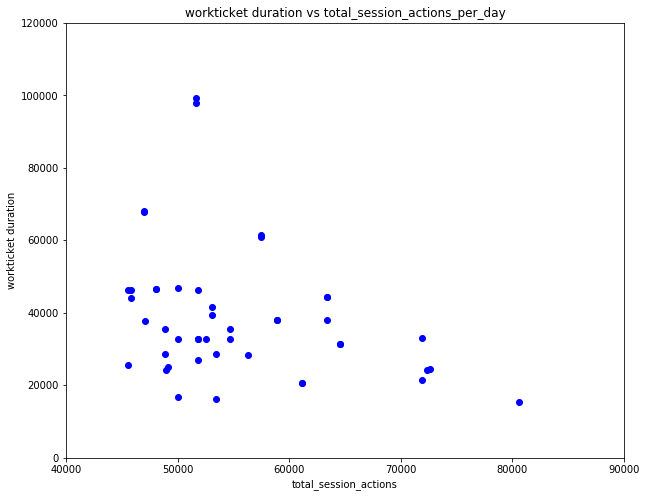

In [26]:
# create a figure
fig1 = plt.figure(figsize=(10,8))
ax1= plt.gca()

# create the data type to be entered in the graph
ax1.scatter(clean['total_session_actions'], clean['workticket_duration'], marker="o", color='b', label='workticket durration' )

# chart axes, title and legend
plt.title("workticket duration vs total_session_actions_per_day")
plt.ylabel("workticket duration")
plt.xlabel("total_session_actions")
ax1.axis([40000,90000 , -100, 120000])

# figure boundaries

plt.show()

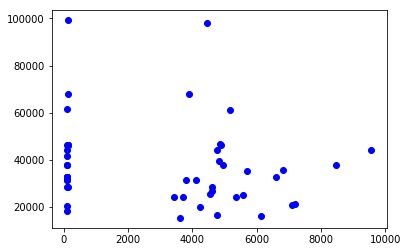

In [29]:
# create a figure

# create the data type to be entered in the graph
plt.scatter(clean['total_number_of_spots'], clean['workticket_duration'], marker="o", color='b', label='workticket durration' )



plt.show()

In [ ]:
this 